In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [3]:
#loading data
data=pd.read_csv("/Users/mennayoussef/Downloads/heart_failure_clinical_records_dataset.csv")

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
#check if outcome value (Death_Event) is balanced or not
data["DEATH_EVENT"].value_counts()


DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='DEATH_EVENT', ylabel='count'>

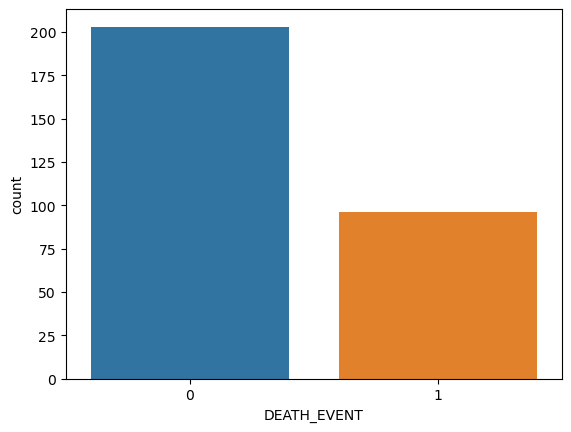

In [12]:
#visualize the imbalance
sns.countplot(x=data["DEATH_EVENT"])

In [15]:
corrmat = data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


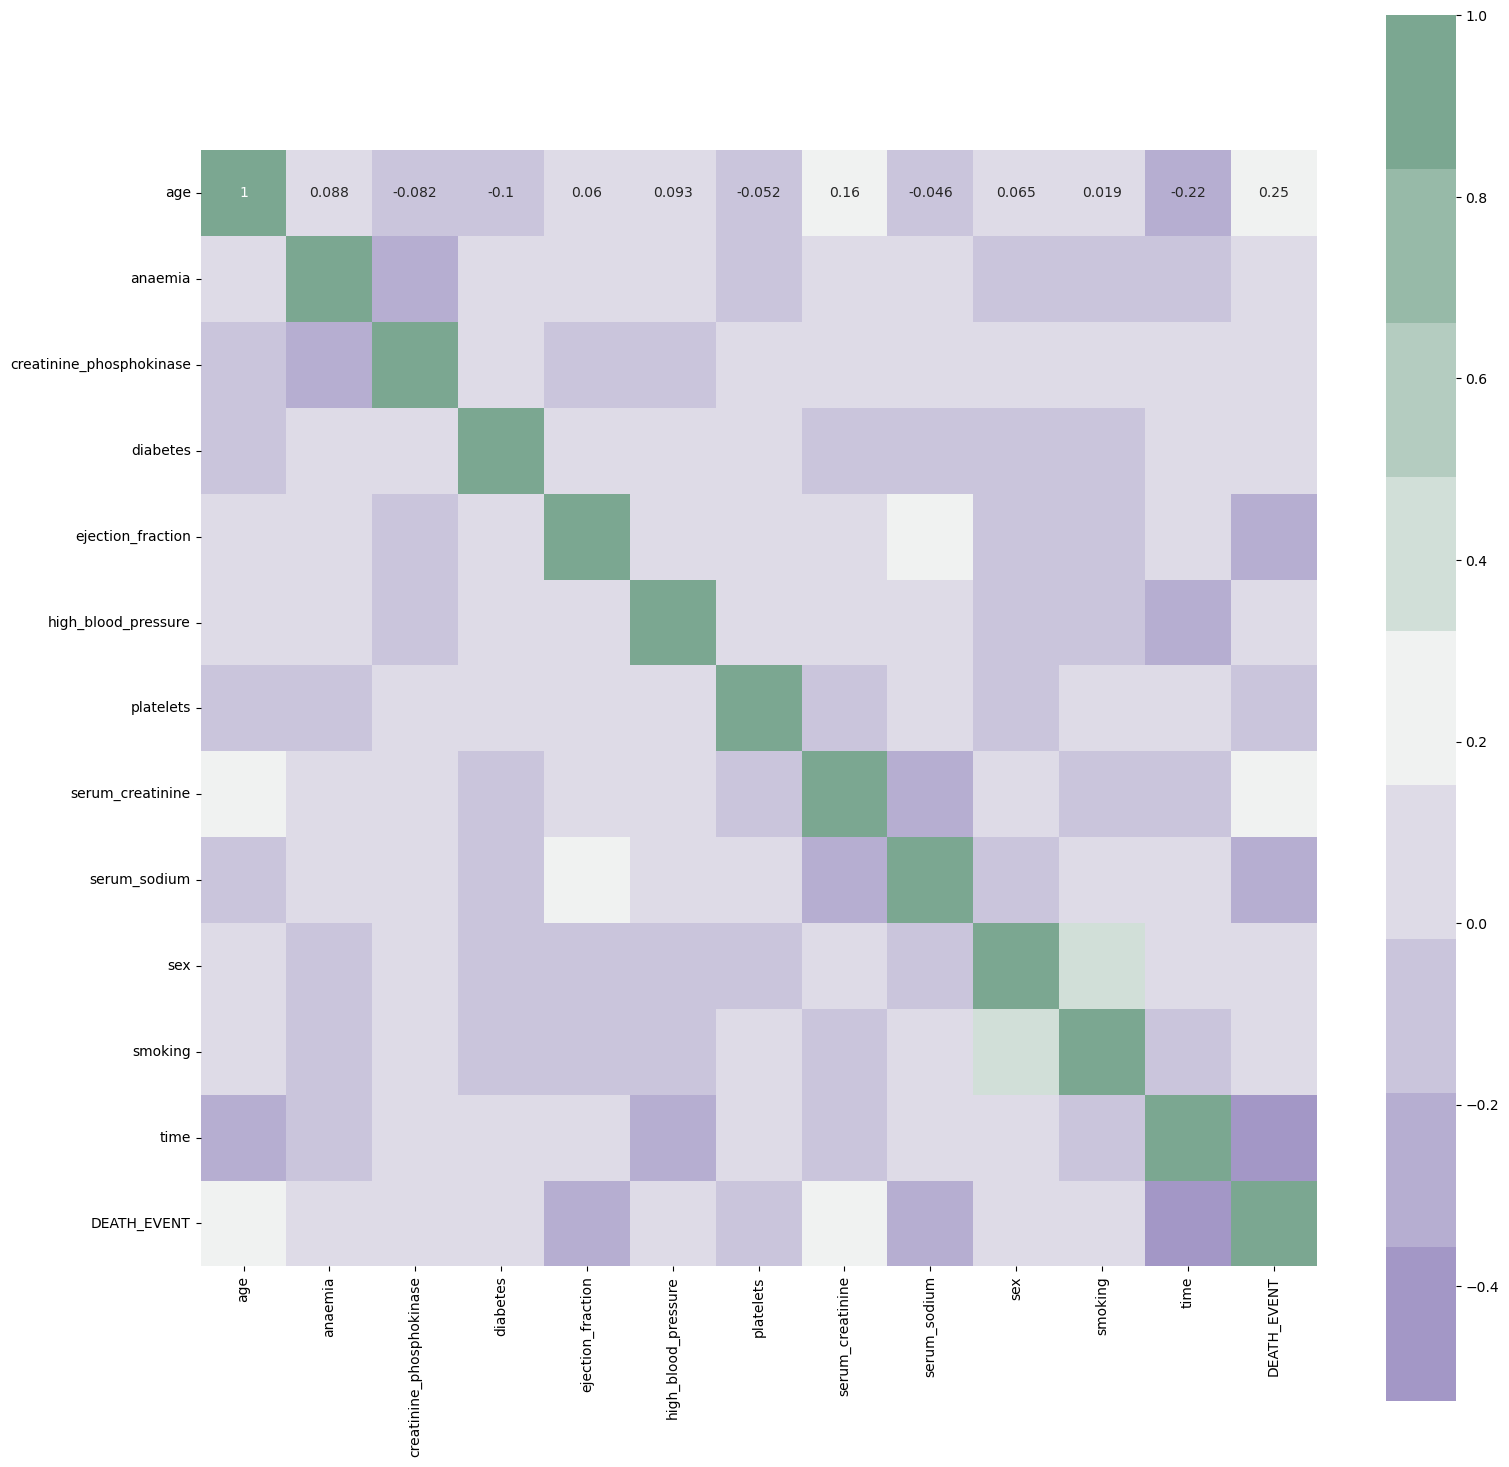

In [25]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);


/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='age', ylabel='count'>

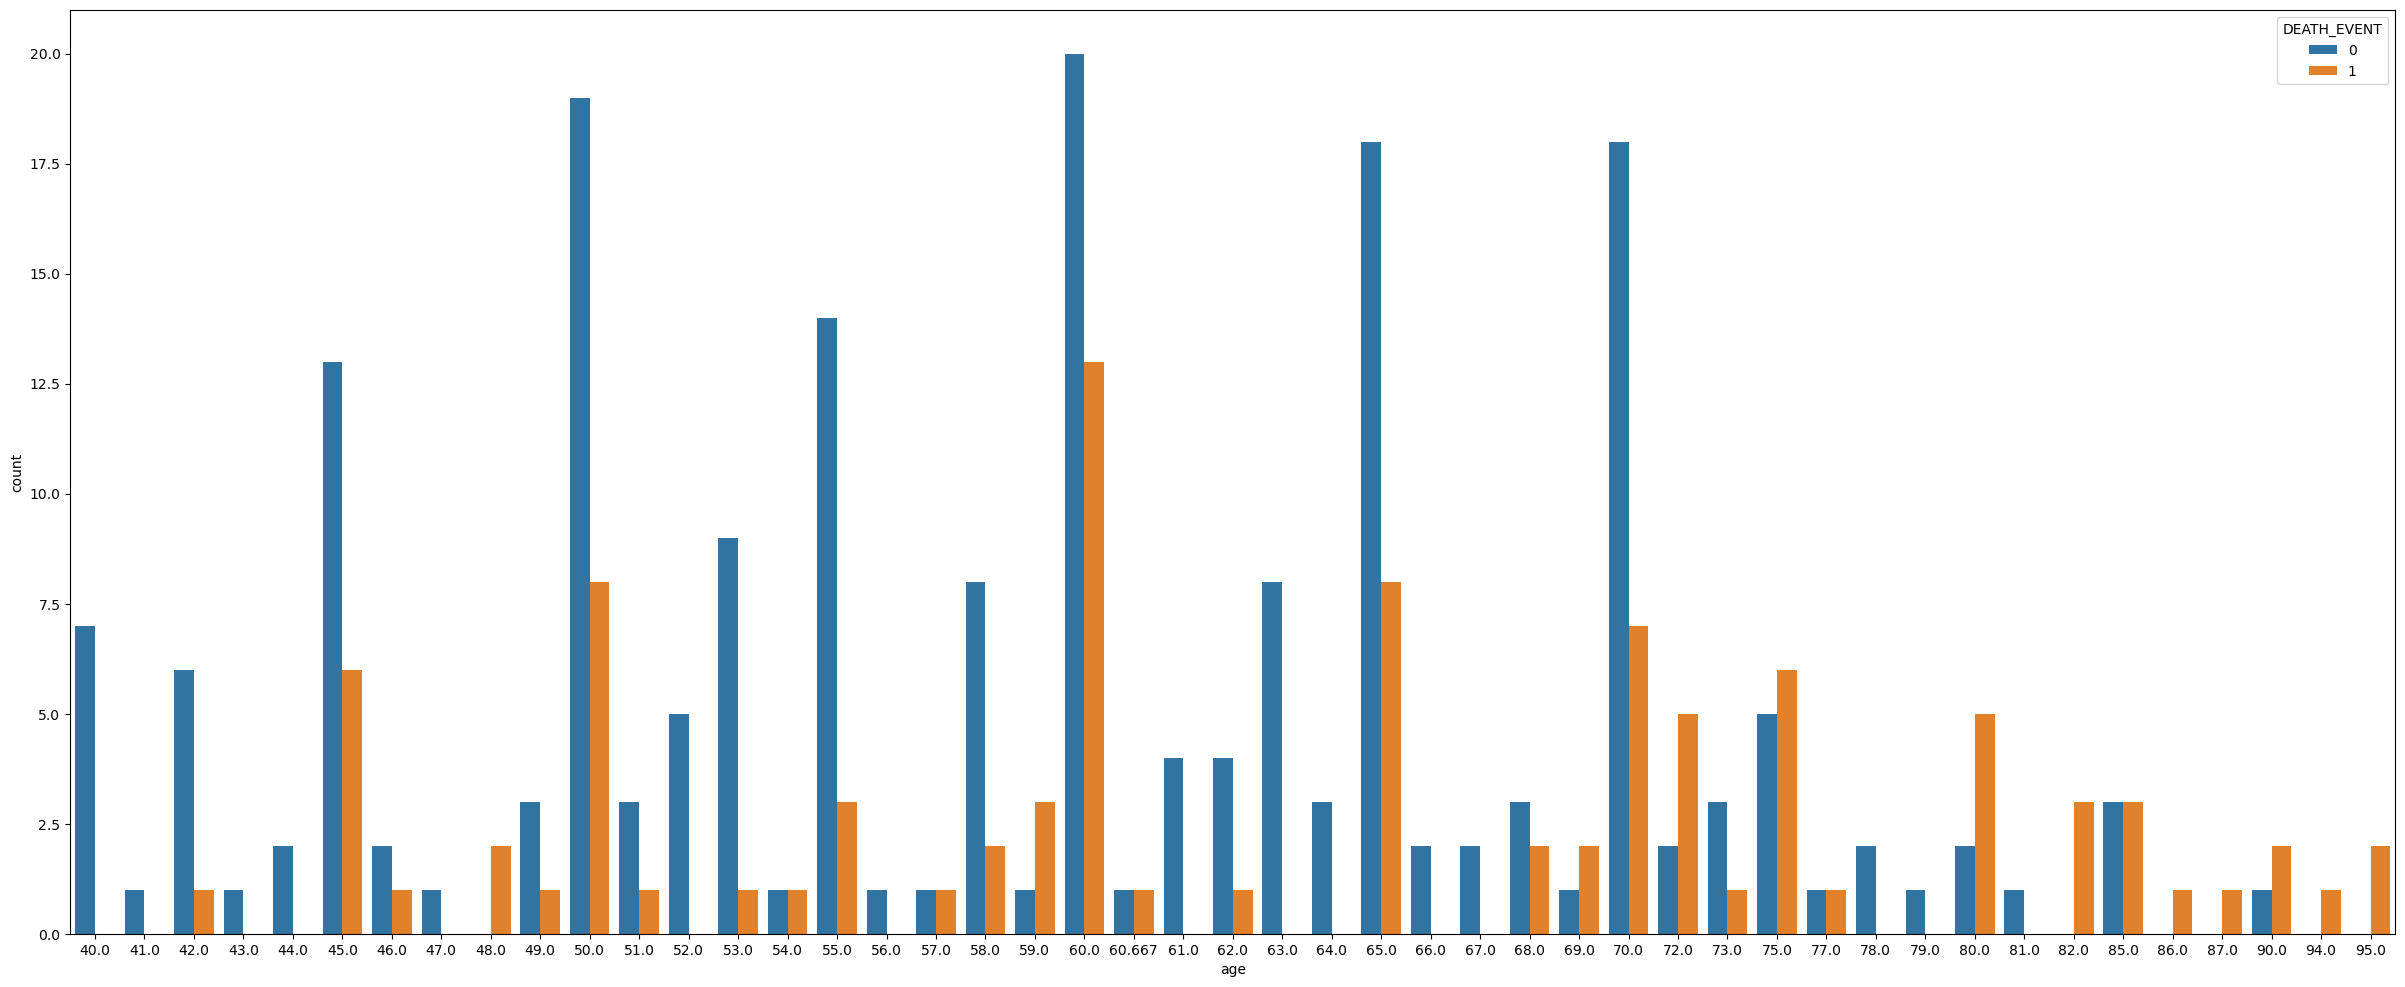

In [31]:
#Evaluating age distribution
plt.figure(figsize=(30,12))
sns.countplot(x=data["age"], data=data, hue="DEATH_EVENT")

In [36]:
#data preprocessing
#set features to X and target to y
X = data.drop(["DEATH_EVENT"], axis=1)
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [39]:
y = data["DEATH_EVENT"]

In [55]:
#scale the features
col_names = list(X.columns)
scaler = preprocessing.StandardScaler()
X_df= scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns = col_names)
X_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mennayoussef/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: >

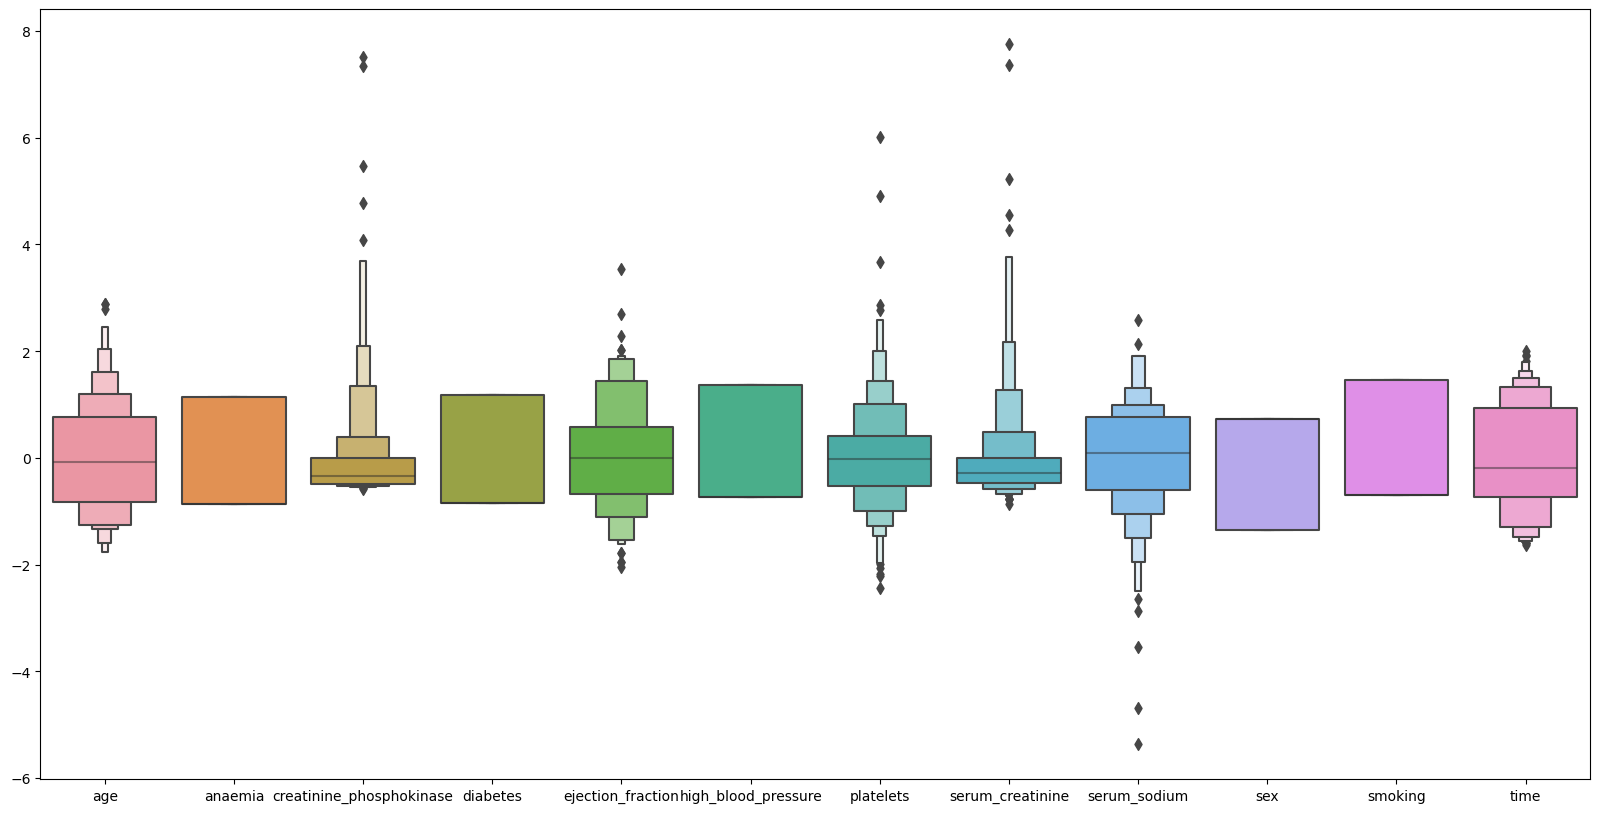

In [57]:
#visualize scaled features
plt.figure(figsize = (20,10))
sns.boxenplot(data = X_df)

In [58]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2)

In [60]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

#1-Initializing the ANN
model = Sequential()

#2-Define the ANN by adding layers
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

from keras.optimizers import SGD

#3-Compiling the ANN
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

#4-Train the ANN
history = model.fit(X_train, y_train, batch_size=32, epochs = 500,callbacks=[early_stopping], validation_split=0.2) 



Epoch 1/500


2023-12-23 08:32:13.602589: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 17ms/step - loss: 0.6927 - accuracy: 0.6649 - val_loss: 0.6917 - val_accuracy: 0.7500
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6597 - val_loss: 0.6902 - val_accuracy: 0.7500
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.6597 - val_loss: 0.6888 - val_accuracy: 0.7500
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.6597 - val_loss: 0.6872 - val_accuracy: 0.7500
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.6597 - val_loss: 0.6858 - val_accuracy: 0.7500
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6597 - val_loss: 0.6843 - val_accuracy: 0.7500
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.6597 - val_loss: 0.6827 - val_accuracy: 0.7500
Epoch 8/500
6/6 [=====================

6/6 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7644 - val_loss: 0.3397 - val_accuracy: 0.8333
Epoch 60/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.7277 - val_loss: 0.3362 - val_accuracy: 0.8333
Epoch 61/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7592 - val_loss: 0.3345 - val_accuracy: 0.8333
Epoch 62/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.7487 - val_loss: 0.3329 - val_accuracy: 0.8333
Epoch 63/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7801 - val_loss: 0.3319 - val_accuracy: 0.8333
Epoch 64/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.7435 - val_loss: 0.3305 - val_accuracy: 0.8333
Epoch 65/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7592 - val_loss: 0.3308 - val_accuracy: 0.8125
Epoch 66/500
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.7592 - val_loss: 0.3273 - val_accuracy: 0.8125
Epoch 118/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7173 - val_loss: 0.3237 - val_accuracy: 0.8125
Epoch 119/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.7906 - val_loss: 0.3225 - val_accuracy: 0.8125
Epoch 120/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4094 - accuracy: 0.7487 - val_loss: 0.3228 - val_accuracy: 0.8125
Epoch 121/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4287 - accuracy: 0.7435 - val_loss: 0.3235 - val_accuracy: 0.8125
Epoch 122/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.7277 - val_loss: 0.3236 - val_accuracy: 0.8125
Epoch 123/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8010 - val_loss: 0.3246 - val_accuracy: 0.8125
Epoch 124/500
6/6 [========

In [62]:
val_acc = np.mean(history.history['val_accuracy'])
val_acc

0.8160971188716751

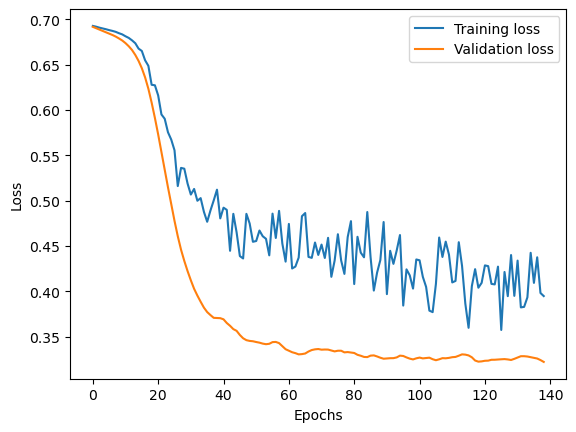

In [71]:
#plot training and validation loss over epochs
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='Training loss')
plt.plot(history_df['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

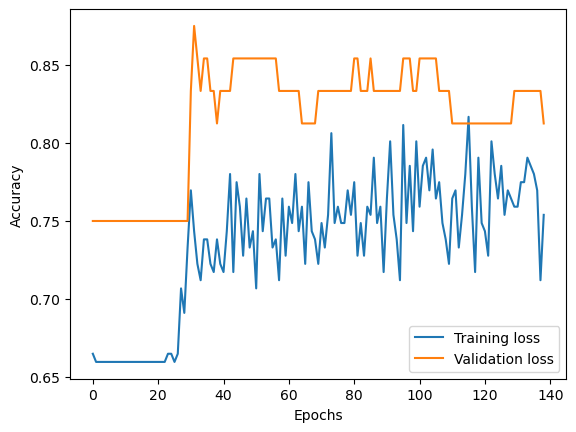

In [72]:
#plot training and validation accuracy over epochs
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='Training loss')
plt.plot(history_df['val_accuracy'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [77]:
#predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

2/2 [==============================] - 0s 1ms/step


<Axes: >

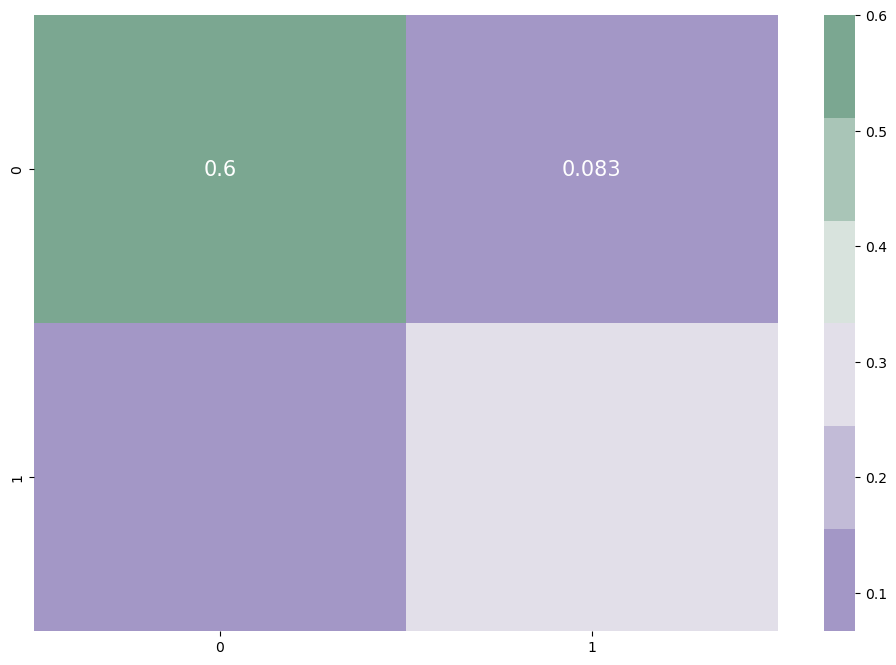

In [78]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [79]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.75      0.79      0.77        19

    accuracy                           0.85        60
   macro avg       0.82      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60

